# Model Creation and EDA

In [ ]:
import numpy as np # To work with arrays
import pandas as pd # Creating DataFrames
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt
sns.set(style = 'white')

In [ ]:
ls

sample_data/  WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
# Read data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Different features in our data
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

**Checking for missing values in our dataset**

In [ ]:
# Converting Total Charges from object to numerical data type
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

# Missing value check
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* There are only 11 missing values for Total Charges. We remove these 11 rows from our data set, since they won't affect our model much

In [ ]:
#Removing missing values
df.dropna(inplace = True)

#Remove customer IDs from the data set
df2 = df.iloc[:,1:]

#Converting the target variable to a binary form
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

1. It is important to **scale the variables in logistic regression so that all of them are within a range of 0 to 1.**
2. We've hence improved the accuracy from 79.7% to 80.7%.

1. Logistic Regression

In [ ]:
# Split into Train & Test Data
from sklearn.model_selection import train_test_split, cross_validate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Try running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
logistic_regresion = metrics.accuracy_score(y_test, prediction_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


AxesSubplot(0.125,0.125;0.775x0.755)


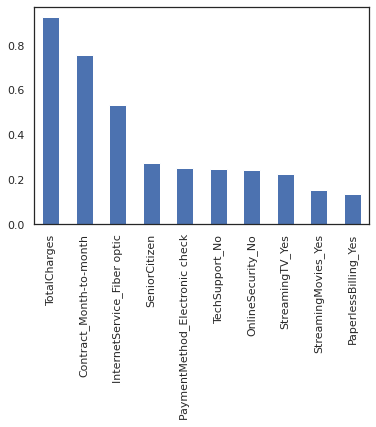

In [ ]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print(weights.sort_values(ascending = False)[:10].plot(kind='bar'))

# Here TotalCharges and Contract_Month-to-month positively affect churn

AxesSubplot(0.125,0.125;0.775x0.755)


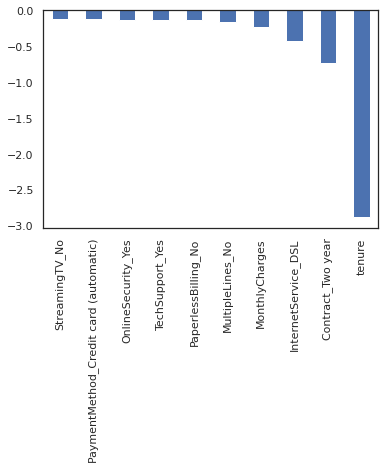

In [ ]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))
# Tenure negatively affects churn (reduces churn)

In [ ]:
# Running logistic regression model
logistic_regression = LogisticRegression(max_iter=500)
lr_scores = cross_validate(logistic_regression, X_train, y_train, cv=5, scoring=['accuracy','f1', 'roc_auc'])
lr_acc = lr_scores['test_accuracy'].mean()
lr_f1 = lr_scores['test_f1'].mean()
lr_roc_auc = lr_scores['test_roc_auc'].mean()

# Printing results
print('Accuracy of folds:', lr_scores['test_accuracy'])
print('Mean accuracy:',lr_acc)
print('\nF1 of folds:', lr_scores['test_f1'])
print('Mean F1:',lr_f1)
print('\nROC AUC of folds:', lr_scores['test_roc_auc'])
print('Mean ROC AUC:',lr_roc_auc)

Accuracy of folds: [0.80304569 0.79086294 0.78963415 0.80386179 0.79878049]
Mean accuracy: 0.7972370104411703

F1 of folds: [0.61507937 0.58299595 0.57494867 0.62955854 0.5942623 ]
Mean F1: 0.5993689636285746

ROC AUC of folds: [0.84162347 0.83986709 0.84869299 0.85858939 0.85182225]
Mean ROC AUC: 0.8481190368557681


**2. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
random_forest = metrics.accuracy_score(y_test, prediction_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8088130774697939


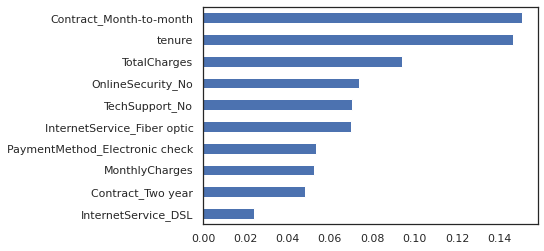

In [ ]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

**3. Support Vector Machine (SVM)**

In [ ]:
# Splitting the dataset into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)
preds = svm_model.predict(X_test)
svm = metrics.accuracy_score(y_test, preds)
svm

0.820184790334044

In [ ]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,preds))

[[953  89]
 [164 201]]


- SVM gives the accuracy to upto 82%.

**4. ADA Boost**

In [ ]:
# Trying AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value)
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
ada = metrics.accuracy_score(y_test, preds)
metrics.accuracy_score(y_test, preds)

0.8159203980099502

**5. XG Boost**

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
xgb = metrics.accuracy_score(y_test, preds)
metrics.accuracy_score(y_test, preds)

0.8294243070362474

XG Boost was able to increase the accuracy on test data to almost 83%.

In [ ]:
print("XGBoost: ", xgb)
print("Random Forest: ", random_forest)
print("SVM: ", svm)
print("Logistic Regression", lr_acc)
print("Adaboost", ada)

XGBoost:  0.8294243070362474
Random Forest:  0.8088130774697939
SVM:  0.820184790334044
Logistic Regression 0.7972370104411703
Adaboost 0.8159203980099502


### Telecom Churn Prediction EDA

1. Analysing Churn w.r.t Seniority

Text(0.5, 1.0, "Senior Citizens' churn")

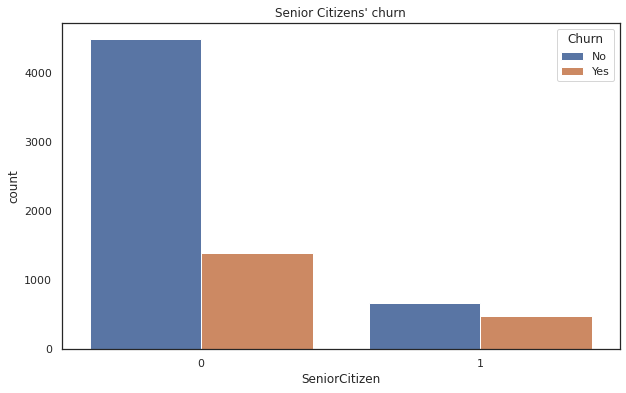

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'SeniorCitizen', hue='Churn', data=df)
ax.set_title(f'Senior Citizens\' churn')
# Younger citizens tend to churn more

2. Analysing Churn w.r.t Monthly Charges

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


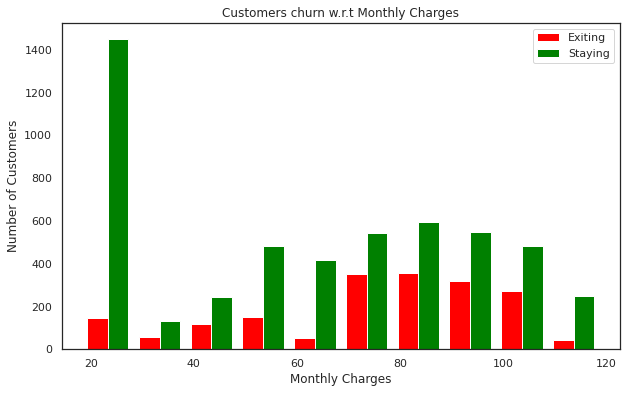

In [ ]:
monthly_yes = df[df.Churn == 'Yes'].MonthlyCharges
monthly_no = df[df.Churn == 'No'].MonthlyCharges


plt.figure(figsize=(10,6))
plt.hist([monthly_yes, monthly_no], color=['red', 'green'], label= ['Exiting', 'Staying'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customers churn w.r.t Monthly Charges')
plt.legend()

3. Visualizing Gender Column (with Bar Charts)

(0.0, 0.5)

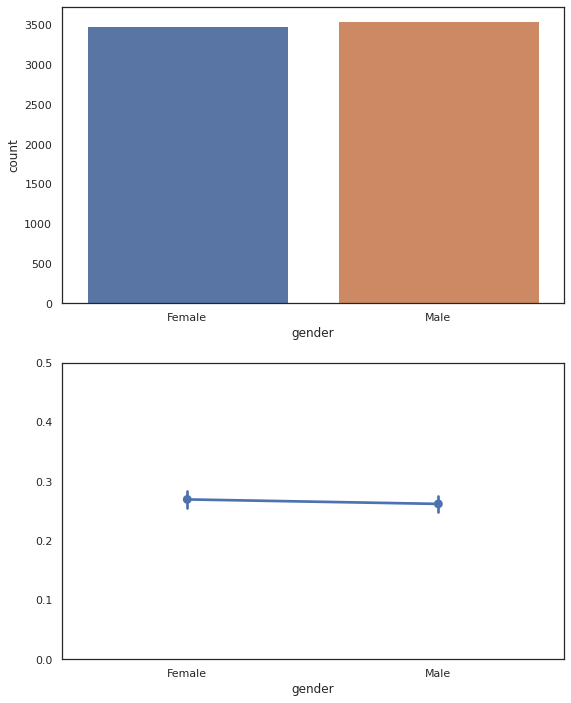

In [ ]:
# Making two subplots to display one below another
_, (axis1, axis2) = plt.subplots(2, figsize=(9, 12))

# Making a histogram across a categorical variable (Countplot)
sns.countplot(x='gender', data=df, ax=axis1)

# Making a point plot
sns.pointplot(x='gender', y=y , data=df, ax=axis2)
axis2.set_ylim(0, 0.5)

# Both Genders are nearly equally distributed in the dataset

4. Making a plot to show the relationship between Churn and Tenure

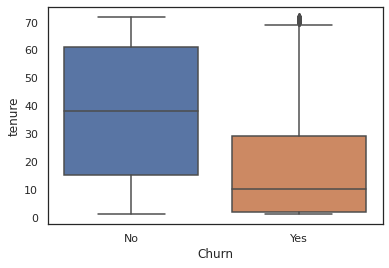

In [ ]:
# Making Box Plot
sns.boxplot(x='Churn', y='tenure', data=df)

# People with more tenure churn less

5. Correlation Heatmap

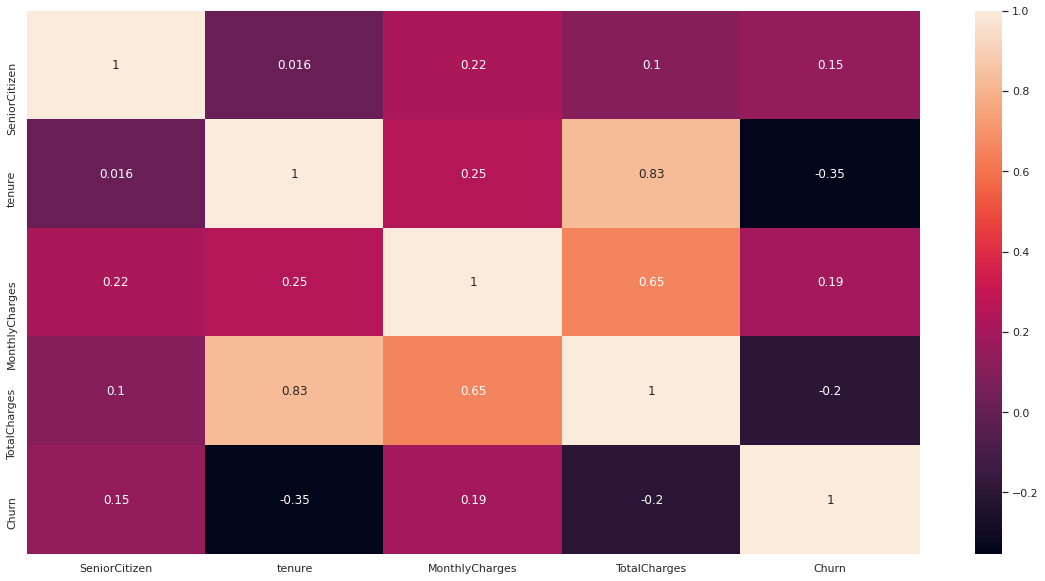

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(20,10))
corr = df2.corr()
heatmap = sns.heatmap(corr,
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)

# Correlation map between different features


We see that there is a strong relation between
*   churn - tenure
*   churn - TotalCharges
*   SeniorCitizen - tenure



6. Contact type w.r.t Churn

Text(0.5, 1.0, 'Churn by Contract Type')

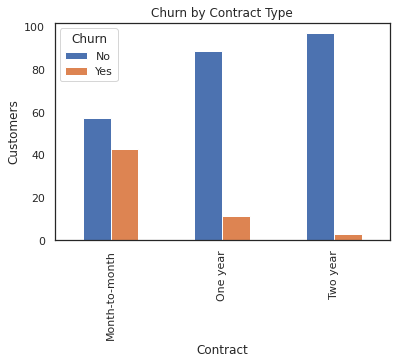

In [ ]:
data_contact = df.groupby(['Contract','Churn']).size().unstack()

contact_barplot = (data_contact.T*100.0 / data_contact.T.sum()).T.plot(kind='bar')
contact_barplot.legend(title = 'Churn')
contact_barplot.set_ylabel('Customers')
contact_barplot.set_title('Churn by Contract Type')
# Two year contracts churn less

7. Customer Churn by Tenure

Text(0, 0.5, 'Customers')

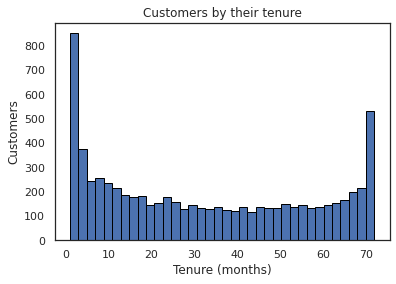

In [ ]:
plt.hist(df['tenure'], bins = int(180/5),edgecolor = 'black')
plt.title('Customers by their tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Customers')

# There are more customers with less than 5 months in tenure, followed by those
# with close to 70 months

8. Churn by Monthly Charges

Text(0.5, 1.0, 'Distribution of total charges by churn')

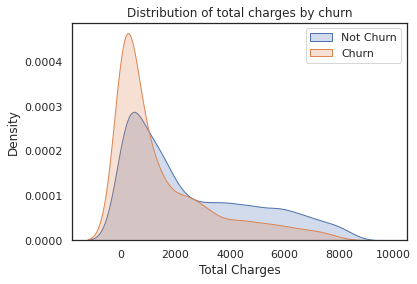

In [ ]:
totalCharge_plot = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ], shade = True)
totalCharge_plot= sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =totalCharge_plot, shade= True)
totalCharge_plot.legend(["Not Churn","Churn"],loc='upper right')
totalCharge_plot.set_ylabel('Density')
totalCharge_plot.set_xlabel('Total Charges')
totalCharge_plot.set_title('Distribution of total charges by churn')

9. Violin Plot to show  quantitative data across tenure

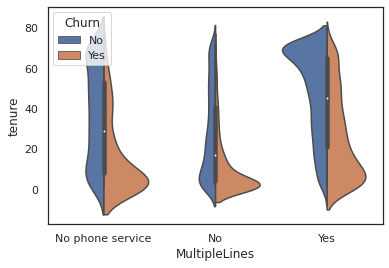

In [ ]:
sns.violinplot(x="MultipleLines", y="tenure", hue="Churn", split=True, kind="violin", data=df)

10. Pie Chart to show the percentage of different plans bought among Monthly, One Year and Two Year

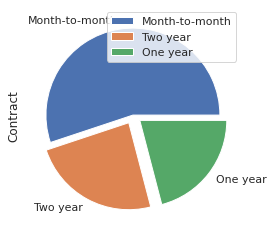

In [ ]:
df.Contract.value_counts().plot(kind='pie', legend= True, explode=[0,0.1,0.1])
#Monthly contracts are most popular

11. Pairplot

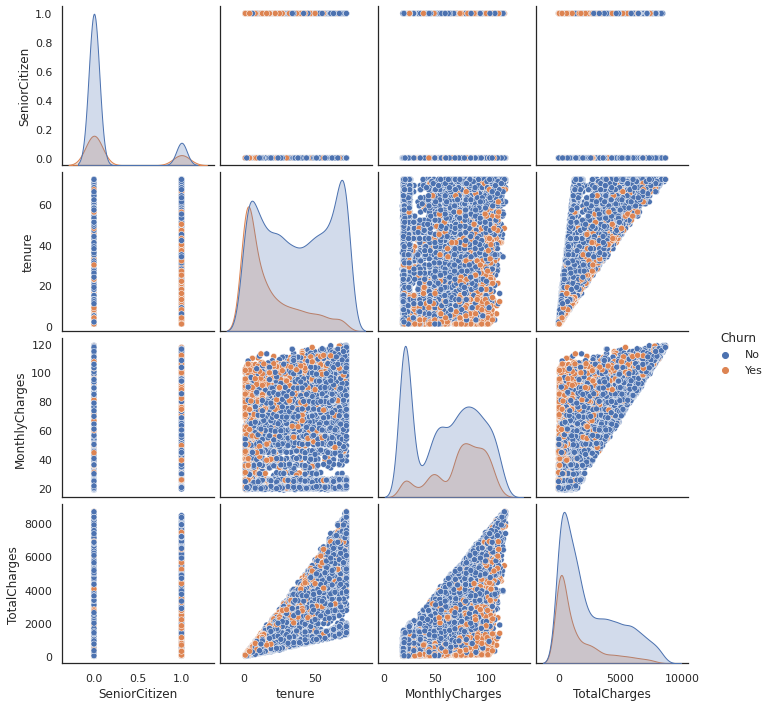

In [ ]:
sns.pairplot(df,hue="Churn")

12. Pie Chart to show the distribution of the data of parnter present or Not

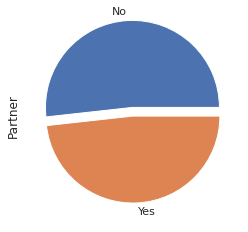

In [ ]:
df['Partner'].value_counts().plot(kind='pie', explode=[0.1,0])
#The ratio is almost similar but most people don't have a partner

13. Pie Chart to show the distribution of the data of whether the customer have depensents present or Not

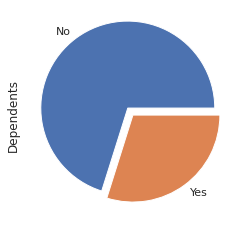

In [ ]:
df['Dependents'].value_counts().plot(kind='pie', explode=[0.1,0])
#Most of the people don't have dependents

14. Distribution of how many senior citizen are male and female and how many non senior citizen are male and female plotted graph between tenure and monthly charges

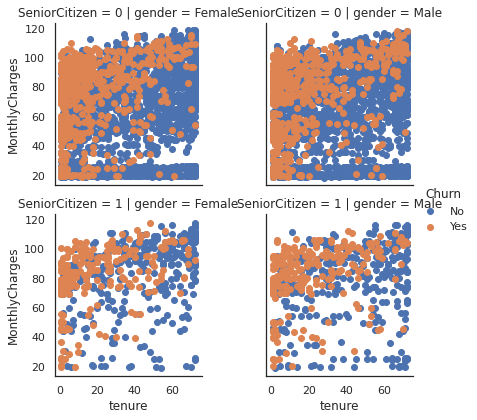

In [ ]:
facetgrid = sns.FacetGrid(df, row='SeniorCitizen', col='gender', hue='Churn')
facetgrid.map(plt.scatter, 'tenure', 'MonthlyCharges')
facetgrid.add_legend();

14. Simple vertical bar graph of number of customer who churned and who did not

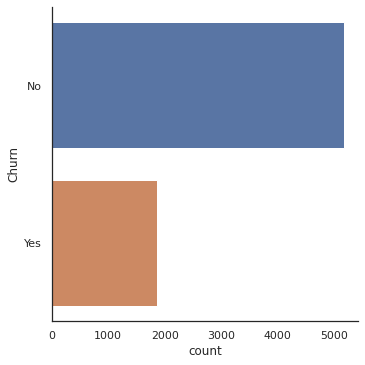

In [ ]:
import seaborn as sns
ax = sns.catplot(y='Churn', kind='count', data=df)
#More than 26% of customer has churned and those need to be kept

**Conculsions drawn from EDA**

1. Having a **2 month contract reduces chances of churn**.

 **2 month contract along with tenure have the most negative relation with Churn** as predicted by our model.
2. Having **DSL internet service also reduces the probability of Churn**.
3. **Total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates**.

 Although fibre optic services are faster, customers are  likely to churn because of it.